In [1]:
# %load /Users/nkreiling/dev/imports.py
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
from datetime import datetime as dt
import sklearn.metrics as metrics
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
from pathlib import Path
#import utils

datasets_root = Path('csv/big') 
plt.rcParams['figure.figsize'] = (25, 5)
%matplotlib inline

In [103]:
base = pd.read_csv("statistik.csv")
base = base[["WAWI_MA_NR","ARTIKEL_NR","KAL_TAG_ID_INT"]].astype('category')

In [104]:
base.describe()

,WAWI_MA_NR,ARTIKEL_NR,KAL_TAG_ID_INT
count,17430,17430,17430
unique,6,83,35
top,61300510,9658688,20181007
freq,2905,210,498


In [105]:
#pandas_profiling.ProfileReport(base[['Modell','Modell2']])

In [57]:
old1 = ['DF_PROGNOSE', 'Modell']
old2 = ['DF_PROGNOSE2', 'Modell2']
new = ['DF_PROGNOSE_ref', 'Modell_ref']
def buildDF(old1,old2):
    columns = ['WAWI_MA_NR', 'ARTIKEL_NR', 'KAL_TAG_ID_INT', 'PROGNOSE_PRISMA'] + old1 + old2
    df = base[columns]
    df.columns = ['WAWI_MA_NR', 'ARTIKEL_NR', 'KAL_TAG_ID_INT', 'PROGNOSE_PRISMA', 'DF_PROGNOSE', 'modell', 'DF_PROGNOSE2', 'modell2']
    df['diff'] = df['DF_PROGNOSE'] - df['DF_PROGNOSE2']
    df['diff_abs'] = df['diff'].apply(abs)
    df['diff_rel'] = df['diff']/df['DF_PROGNOSE']
    df['modell_eq'] = df['modell'] == df['modell2']
    return df
df1 = buildDF(old1,old2)
df2 = buildDF(old1,new)
df3 = buildDF(old2,new)

/Users/nkreiling/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nkreiling/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nkreiling/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [42]:
print(df1['modell_eq'].value_counts())
print(df2['modell_eq'].value_counts())
print(df3['modell_eq'].value_counts())

True     17360
False       70
Name: modell_eq, dtype: int64
True     11410
False     6020
Name: modell_eq, dtype: int64
True     11410
False     6020
Name: modell_eq, dtype: int64


In [69]:
df1.groupby('modell_eq')['diff'].agg(['count','mean','var']).sort_values("mean")

,count,mean,var
modell_eq,,,
False,70,-0.058214,1.612124
True,17360,0.000000,0.000000


In [80]:
df1.loc[df1['modell_eq']==False,['WAWI_MA_NR','ARTIKEL_NR','modell','modell2']].drop_duplicates()

,WAWI_MA_NR,ARTIKEL_NR,modell,modell2
4830,61300001,7656858,rebeFOREST06,marktDT04
5215,61300510,1308362,rebeDT05,rebeFOREST06


In [110]:
print(df1.groupby('KAL_TAG_ID_INT')['KAL_TAG_ID_INT'].count().astype('category').describe())
print(df1.loc[df1['modell_eq']==False].groupby('KAL_TAG_ID_INT')['KAL_TAG_ID_INT'].count().astype('category').describe())
#df1.query('WAWI_MA_NR==61300001&ARTIKEL_NR==7656858').groupby('KAL_TAG_ID_INT')['KAL_TAG_ID_INT'].count().astype('category').describe()

count      35
unique      1
top       498
freq       35
Name: KAL_TAG_ID_INT, dtype: int64
count     35
unique     1
top        2
freq      35
Name: KAL_TAG_ID_INT, dtype: int64


In [181]:
df.loc[:,['DF_PROGNOSE','DF_PROGNOSE2','DF_PROGNOSE_ref', 'diff_old','diff_1','diff_2']].tail()

/Users/nkreiling/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,DF_PROGNOSE,DF_PROGNOSE2,DF_PROGNOSE_ref,diff_old,diff_1,diff_2
17425,1.179,1.179,NaN,NaN,NaN,NaN
17426,1.349,1.349,NaN,NaN,NaN,NaN
17427,0.000,0.000,NaN,NaN,NaN,NaN
17428,0.000,0.000,NaN,NaN,NaN,NaN
17429,0.000,0.000,NaN,NaN,NaN,NaN


In [71]:
df3.groupby('modell_eq')['diff'].agg(['count','mean','var']).sort_values("mean")

,count,mean,var
modell_eq,,,
False,6020,-6.024137,956.504201
True,11410,-2.027572,286.087783


In [ ]:
df.loc[:,['DF_PROGNOSE','DF_PROGNOSE2','DF_PROGNOSE_ref', 'diff_old','diff_1','diff_2']].describe()

In [131]:
df3.groupby('modell2')[['modell','modell2']].agg(['mean'])
#.plot(kind="pie",y="count")

ValueError: no results

In [ ]:
.index

In [179]:
sub = df3.loc[df3['modell_eq']==True]
#sub = df3
#sub.groupby('modell')['DF_PROGNOSE'].agg(['mean']).join(sub.groupby('modell2')['DF_PROGNOSE2'].agg(['mean']).rename(columns={"count":"count2","mean":"mean2"})).applymap(lambda s: s/35).sort_values("count")
#sub.groupby('modell')['DF_PROGNOSE'].agg(['mean']).join(sub.groupby('modell2')['DF_PROGNOSE2'].agg(['mean']).rename(columns={"count":"count2","mean":"mean2"})).sort_values("mean")
sub.groupby('modell')['diff'].agg(['var','count']).sort_values('var')
#.plot(kind="pie",y="count")

,var,count
modell,,
marktLASSO11,0.000000,70
marktLM01,0.000000,35
rebeLASSO11,0.000000,70
rebeRIDGE03,0.381524,105
marktDT04,9.362515,35
marktLARS03,12.508500,35
rebeDT05,19.120472,35
rebeFOREST06,26.678084,6475
marktRIDGE11,127.003410,980


In [178]:
df3.groupby('modell2')['diff'].agg(['count','mean','var']).sort_values("mean")

,count,mean,var
modell2,,,
marktEN08,1085,-19.684494,2855.029237
marktLARS03,315,-16.150689,1059.561440
marktLM10,1015,-12.882261,1479.181325
marktLM11,980,-7.240506,387.184903
rebeLM09,2905,-5.535809,913.704377
rebeDT05,140,-4.010029,73.533500
rebeLARS09,945,-1.711805,134.897677
marktLM01,35,0.000000,0.000000
rebeLASSO11,70,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f769828>]], dtype=object)

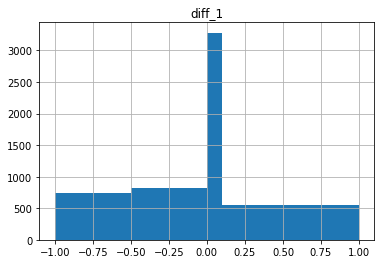

In [17]:
df.hist(column='diff_1',bins=[-1,-0.5,0,0.1,0.5,1])

In [ ]:
import great_expectations as ge
con = ge.data_context.pandas_context.PandasDataset(df)

In [27]:
df.sort_values("diff_old_abs",ascending=False).head()

,WAWI_MA_NR,ARTIKEL_NR,KAL_TAG_ID_INT,DF_PROGNOSE,Modell,PROGNOSE_PRISMA,Erstell_TS,DF_PROGNOSE2,Modell2,Erstell_TS2,...,Erstell_TS_ref,diff_old,diff_1,diff_2,diff_old_abs,diff_1_abs,diff_2_abs,diff_old_rel,diff_1_rel,diff_2_rel
5239,61300510,1308362,20181005,9.455,rebeDT05,7.178,2018-09-07 13:27:24.342938,5.259,rebeFOREST06,2018-09-07 13:46:48.146713,...,2018-09-07 14:27:40.395469,4.196,1.016,5.212,4.196,1.016,5.212,0.797870,0.193193,0.551243
5215,61300510,1308362,20180903,9.357,rebeDT05,5.628,2018-09-07 13:27:24.342938,5.581,rebeFOREST06,2018-09-07 13:46:48.146713,...,2018-09-07 14:27:40.395469,3.776,-6.172,-2.396,3.776,6.172,2.396,0.676581,-1.105895,-0.256065
4844,61300001,7656858,20181002,1.933,rebeFOREST06,0.765,2018-09-07 13:27:24.342938,4.857,marktDT04,2018-09-07 13:46:48.146713,...,2018-09-07 14:27:40.395469,-2.924,8.694,5.770,2.924,8.694,5.770,-0.602018,1.789994,2.984997
4840,61300001,7656858,20181001,1.961,rebeFOREST06,1.006,2018-09-07 13:27:24.342938,4.857,marktDT04,2018-09-07 13:46:48.146713,...,2018-09-07 14:27:40.395469,-2.896,0.873,-2.023,2.896,0.873,2.023,-0.596253,0.179741,-1.031617
4833,61300001,7656858,20180913,6.658,rebeFOREST06,0.642,2018-09-07 13:27:24.342938,9.250,marktDT04,2018-09-07 13:46:48.146713,...,2018-09-07 14:27:40.395469,-2.592,3.549,0.957,2.592,3.549,0.957,-0.280216,0.383676,0.143737
